In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

MODULE 1

In [2]:
df = pd.read_csv("D:\\Downloads\\bcancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [4]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [5]:
df.shape

(569, 33)

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.columns[df.isna().sum() > 0]

Index(['Unnamed: 32'], dtype='object')

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

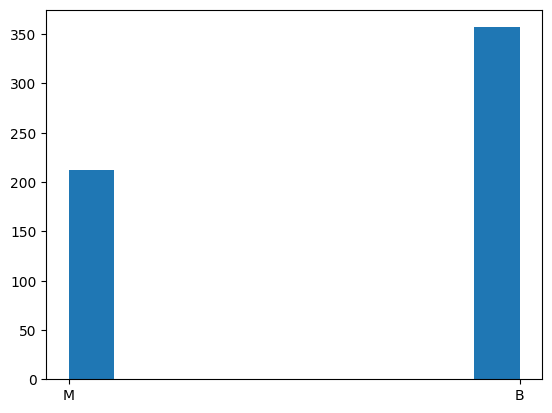

In [11]:
plt.hist(df['diagnosis'])

<Axes: >

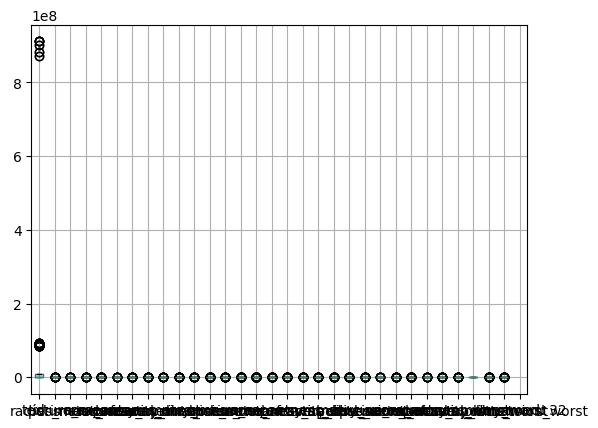

In [12]:
df.boxplot()

<Axes: xlabel='count', ylabel='diagnosis'>

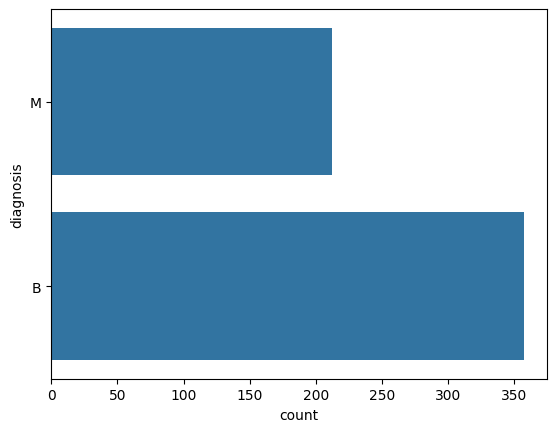

In [13]:
sns.countplot(df["diagnosis"])

<Axes: ylabel='radius_mean'>

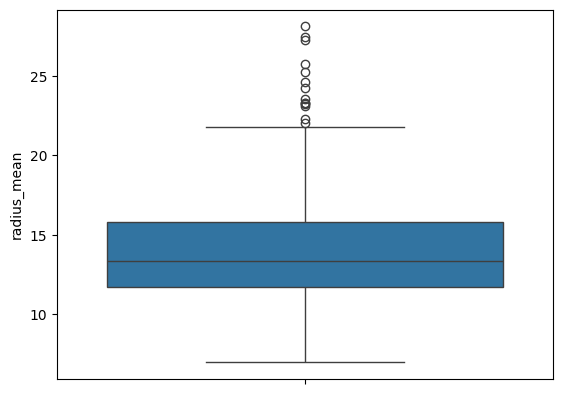

In [14]:
sns.boxplot(df['radius_mean'])

In [15]:
categorical_columns = df.select_dtypes(include = ['object', "category"]).columns
categorical_columns

Index(['diagnosis'], dtype='object')

MODULE 2

In [16]:
df = df.drop(['Unnamed: 32', "id"], axis = 1)

In [17]:
df = df.drop_duplicates()

In [18]:
# sns.pairplot(df)

In [19]:
df_numeric = df.select_dtypes(include = ['int64', 'float64'])
print(df_numeric)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

BINNING AND TRANSFORMATION

In [20]:
skewness_radius_mean = df["radius_mean"].skew()
if abs(skewness_radius_mean) > 0.5: # 0.5 is a rule of thumb
    print("col needs binning")

col needs binning


In [21]:
len(df_numeric.columns)

30

In [22]:
col_list = df_numeric.columns
skewed_count = 0
skewed_col = []

for i in col_list:
    if abs(df[i].skew()) > 0.5:
        print(i, "is skewed,", "needs binning")
        skewed_count = skewed_count + 1
        skewed_col.append(i)

print(skewed_count)

radius_mean is skewed, needs binning
texture_mean is skewed, needs binning
perimeter_mean is skewed, needs binning
area_mean is skewed, needs binning
compactness_mean is skewed, needs binning
concavity_mean is skewed, needs binning
concave points_mean is skewed, needs binning
symmetry_mean is skewed, needs binning
fractal_dimension_mean is skewed, needs binning
radius_se is skewed, needs binning
texture_se is skewed, needs binning
perimeter_se is skewed, needs binning
area_se is skewed, needs binning
smoothness_se is skewed, needs binning
compactness_se is skewed, needs binning
concavity_se is skewed, needs binning
concave points_se is skewed, needs binning
symmetry_se is skewed, needs binning
fractal_dimension_se is skewed, needs binning
radius_worst is skewed, needs binning
perimeter_worst is skewed, needs binning
area_worst is skewed, needs binning
compactness_worst is skewed, needs binning
concavity_worst is skewed, needs binning
symmetry_worst is skewed, needs binning
fractal_dime

In [50]:
for i in skewed_col:
    sns.boxplot(x = df[i])
    plt.show()

KeyError: 'concave points_mean'

In [24]:
skewed_col

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [25]:
for i in skewed_col:
    df[i] = np.log1p(df[i])

In [26]:
col_list = df.select_dtypes(include = ['int64', 'float64']).columns
skewed_count = 0
skewed_col = []

for i in col_list:
    if abs(df[i].skew()) > 0.5:
        print(i, "is skewed,", "needs binning")
        skewed_count = skewed_count + 1
        skewed_col.append(i)

print(skewed_count)

compactness_mean is skewed, needs binning
concavity_mean is skewed, needs binning
concave points_mean is skewed, needs binning
symmetry_mean is skewed, needs binning
fractal_dimension_mean is skewed, needs binning
radius_se is skewed, needs binning
texture_se is skewed, needs binning
perimeter_se is skewed, needs binning
area_se is skewed, needs binning
smoothness_se is skewed, needs binning
compactness_se is skewed, needs binning
concavity_se is skewed, needs binning
concave points_se is skewed, needs binning
symmetry_se is skewed, needs binning
fractal_dimension_se is skewed, needs binning
radius_worst is skewed, needs binning
compactness_worst is skewed, needs binning
concavity_worst is skewed, needs binning
symmetry_worst is skewed, needs binning
fractal_dimension_worst is skewed, needs binning
20


In [27]:
for i in skewed_col:
    df[i] = np.cbrt(df[i])

In [28]:
col_list = df.select_dtypes(include = ['int64', 'float64']).columns
skewed_count = 0
skewed_col = []

for i in col_list:
    if abs(df[i].skew()) > 0.5:
        print(i, "is skewed,", "needs binning")
        skewed_count = skewed_count + 1
        skewed_col.append(i)

print(skewed_count)

concave points_mean is skewed, needs binning
fractal_dimension_mean is skewed, needs binning
radius_se is skewed, needs binning
area_se is skewed, needs binning
smoothness_se is skewed, needs binning
compactness_se is skewed, needs binning
concave points_se is skewed, needs binning
symmetry_se is skewed, needs binning
fractal_dimension_se is skewed, needs binning
concavity_worst is skewed, needs binning
symmetry_worst is skewed, needs binning
fractal_dimension_worst is skewed, needs binning
12


In [29]:
df.duplicated().any() # no duplicated rows

False

In [30]:
for i in skewed_col:
    df[i], lambda_value = stats.boxcox(df[i] + 1)

In [31]:
col_list = df.select_dtypes(include = ['int64', 'float64']).columns
skewed_count = 0

for i in col_list:
    if abs(df[i].skew()) > 0.5:
        print(i, "is skewed,", "needs binning")
        skewed_count = skewed_count + 1

print(skewed_count)

0


In [32]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,2.943913,2.431857,4.818667,6.909753,0.11840,0.625718,0.640242,0.788745,0.600594,...,1.484674,17.33,5.223594,7.610853,0.16220,0.799054,1.985251,0.2654,0.192591,0.063895
1,M,3.071303,2.932260,4.897093,7.190676,0.08474,0.423026,0.436784,0.574203,0.550172,...,1.482419,23.41,5.073923,7.579168,0.12380,0.555150,1.185843,0.1860,0.187587,0.063817
2,M,3.029650,3.102342,4.875197,7.093405,0.10960,0.529355,0.564781,0.742548,0.572921,...,1.473847,25.53,5.033701,7.444249,0.14440,0.707285,1.601528,0.2430,0.190403,0.063812
3,M,2.519308,3.062456,4.364117,5.958683,0.14250,0.629878,0.600222,0.682656,0.613467,...,1.403892,26.50,4.603869,6.343353,0.20980,0.854513,1.952832,0.2575,0.195398,0.063958
4,M,3.058237,2.730464,4.913390,7.168580,0.10030,0.499590,0.565304,0.680142,0.549892,...,1.467246,16.67,5.031744,7.362645,0.13740,0.571317,1.513125,0.1625,0.185861,0.063763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,3.116178,3.152309,4.962845,7.299797,0.11100,0.478650,0.602078,0.769453,0.542004,...,1.485075,26.40,5.118592,7.614805,0.14100,0.576593,1.532403,0.2216,0.184187,0.063731
565,M,3.050694,3.375880,4.884316,7.140453,0.09780,0.461664,0.512398,0.661936,0.544505,...,1.474594,38.25,5.049856,7.457032,0.11660,0.560196,1.361942,0.1628,0.186838,0.063700
566,M,2.867899,3.370051,4.694096,6.755885,0.08455,0.460099,0.445600,0.510087,0.528430,...,1.441405,34.12,4.849684,7.025538,0.11390,0.645986,1.399853,0.1418,0.185098,0.063771
567,M,3.072693,3.412137,4.949469,7.143618,0.11780,0.625318,0.670281,0.799988,0.598951,...,1.486721,39.42,5.223594,7.507690,0.16500,0.854952,2.249867,0.2650,0.191554,0.063904


bin first and then normalize

Checking if data follows gaussian distribution

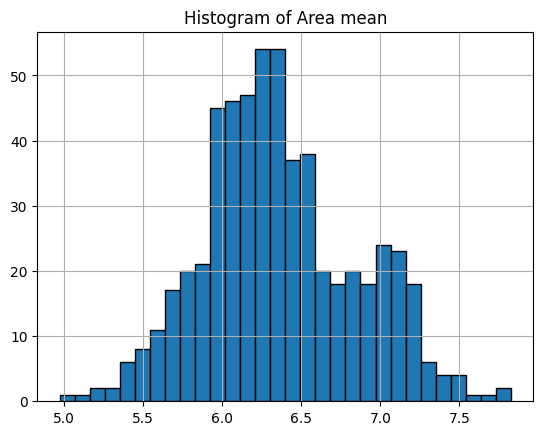

In [33]:
df["area_mean"].hist(bins = 30, edgecolor = 'black')
plt.title("Histogram of Area mean")
plt.show()

In [34]:
skew_compactness_mean = df["compactness_mean"].skew()
kurt_compactness_mean = df["compactness_mean"].kurtosis()

print(skew_compactness_mean, kurt_compactness_mean)

0.28904516561250665 -0.3082470687104837


In [35]:
scaler = StandardScaler()
std_data = scaler.fit_transform(df[["compactness_mean"]])

std_data

array([[ 2.48792523],
       [-0.38744411],
       [ 1.1209206 ],
       [ 2.54694134],
       [ 0.69867713],
       [ 1.26446414],
       [ 0.27111513],
       [ 1.18712644],
       [ 1.5710449 ],
       [ 2.10714881],
       [-0.69757639],
       [ 0.6378522 ],
       [ 2.17242499],
       [ 0.09559209],
       [ 1.99568397],
       [ 1.11509564],
       [-0.55526049],
       [ 1.68235013],
       [ 0.14656312],
       [-0.32329315],
       [ 0.60005943],
       [-0.74679718],
       [ 1.81677241],
       [ 0.13644173],
       [ 0.90702036],
       [ 1.97690823],
       [ 1.48942934],
       [ 0.22430241],
       [ 1.26029523],
       [ 0.39792371],
       [ 1.5138812 ],
       [ 0.99772292],
       [ 0.96727853],
       [ 1.2907378 ],
       [ 1.0621671 ],
       [ 0.71202691],
       [ 0.28655177],
       [-1.66274874],
       [-1.16103076],
       [ 0.57401252],
       [-0.87960568],
       [ 0.50876398],
       [ 1.8801968 ],
       [ 0.87407061],
       [ 0.1866933 ],
       [ 1

MODULE 3

<Axes: xlabel='diagnosis', ylabel='Count'>

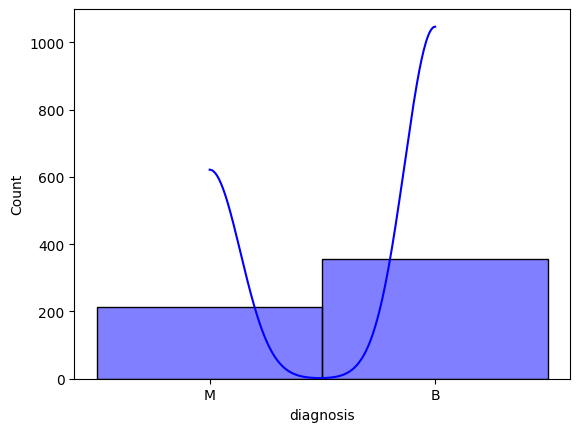

In [36]:
# univariate analysis
sns.histplot(df["diagnosis"], kde = True, color = "blue")

In [37]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

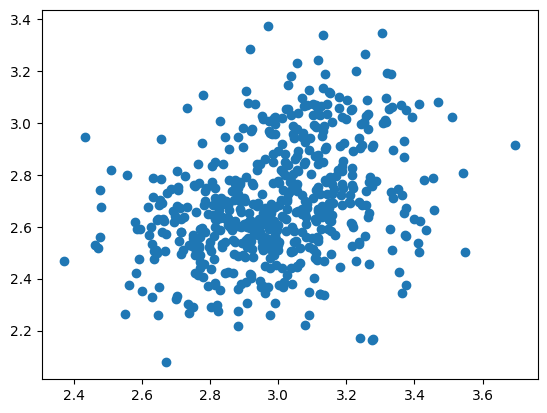

In [38]:
# bivariate analysis
plt.scatter(df["texture_mean"], df["radius_mean"])

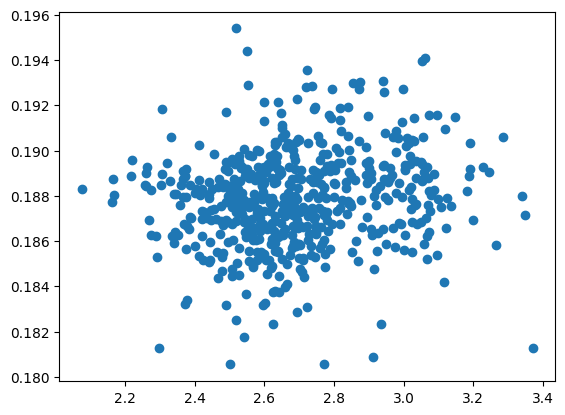

In [39]:
plt.scatter(df["radius_mean"], df["symmetry_worst"])

In [40]:
df_nodiag = df.drop("diagnosis", axis = 1)######## change to numeric

In [41]:
# sns.pairplot(df_nodiag)

<Axes: >

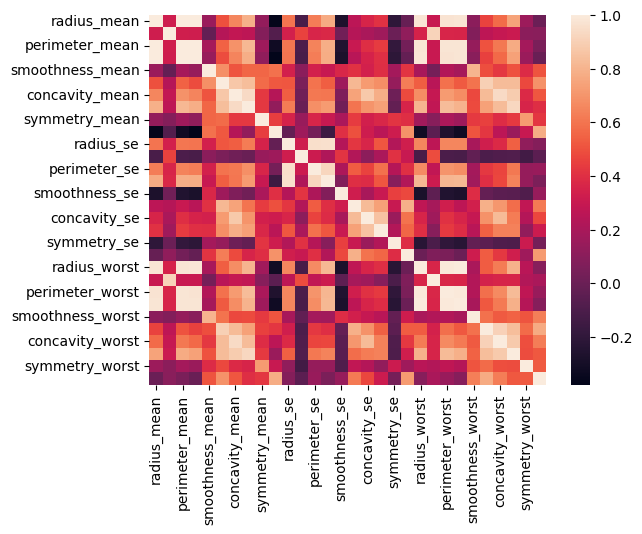

In [42]:
sns.heatmap(df_nodiag.corr())

In [43]:
# since the dataset does not contain any time series another small dataset

In [44]:
from statsmodels.datasets import get_rdataset

In [45]:
dataset = get_rdataset("AirPassengers", "datasets")
df = dataset.data
df['time'] = pd.date_range(start='1949-01', periods=len(df), freq='M')
df.set_index('time', inplace=True)

C:\Users\Taniya\AppData\Local\Temp\ipykernel_25792\243256406.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['time'] = pd.date_range(start='1949-01', periods=len(df), freq='M')


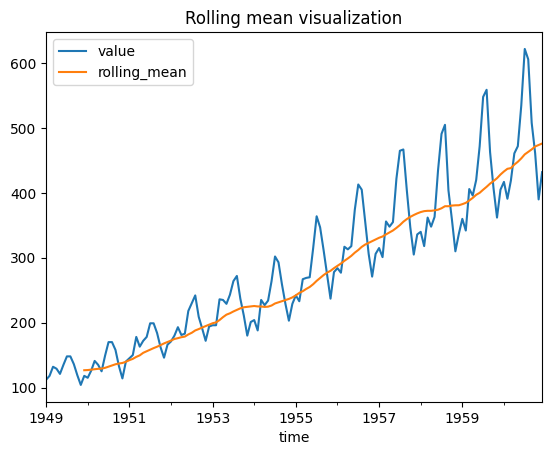

In [47]:
df["rolling_mean"] = df["value"].rolling(window = 12).mean()
df.plot(title = "Rolling mean visualization")
plt.show()

<Axes: xlabel='year'>

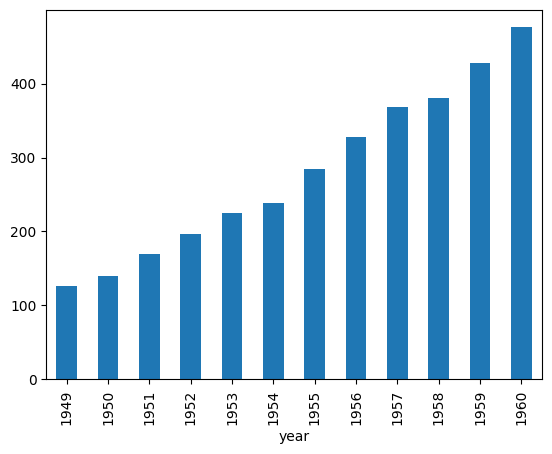

In [48]:
df["year"] = df.index.year
grped = df.groupby('year')['value'].mean()
grped.plot(kind = "bar")

C:\Users\Taniya\AppData\Local\Temp\ipykernel_25792\1107018744.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df["value"].resample("Y").mean()


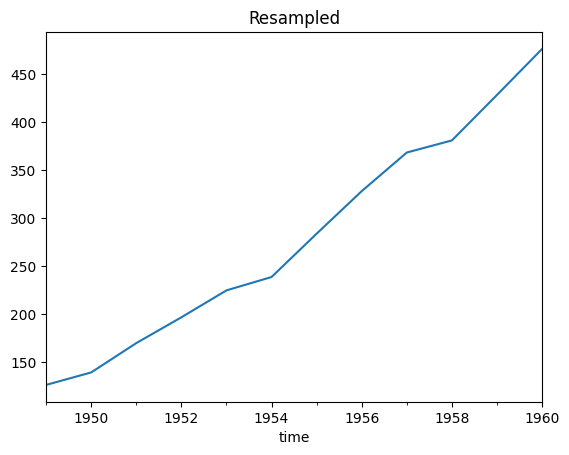

In [49]:
yearly = df["value"].resample("Y").mean()
yearly.plot(title = "Resampled")
plt.show()

MODULE 4

In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [52]:
df = pd.read_csv("D:\\Downloads\\bcancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [53]:
df = df.drop(['id', "Unnamed: 32"], axis = 1)

In [58]:
scaler = StandardScaler()
temp_df = df.drop("diagnosis", axis = 1)
X = scaler.fit_transform(temp_df)

In [61]:
model_spectral = SpectralClustering(n_clusters = 2, affinity = "nearest_neighbors")
labels = model_spectral.fit_predict(X)

C:\Users\Taniya\AppData\Local\Temp\ipykernel_25792\1310829137.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:, 1], cmap = model_spectral.labels_)


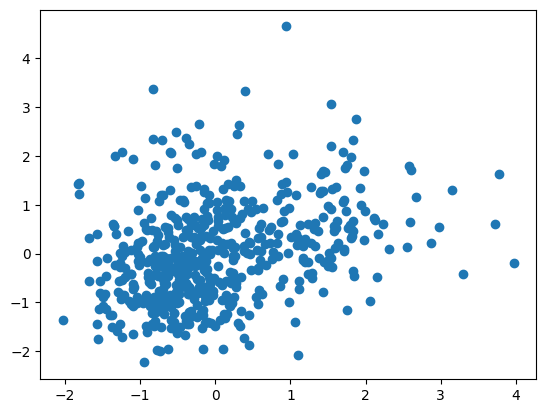

In [ ]:
plt.scatter(X[:,0], X[:, 1], cmap = model_spectral.labels_) ########### check

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [125.0, 125.0, 135.0, 135.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [375.0, 375.0, 385.0, 385.0],
  [615.0, 615.0, 625.0, 625.0],
  [715.0, 715.0, 725.0, 725.0],
  [785.0, 785.0, 795.0, 795.0],
  [895.0, 895.0, 905.0, 905.0],
  [885.0, 885.0, 900.0, 900.0],
  [995.0, 995.0, 1005.0, 1005.0],
  [1015.0, 1015.0, 1025.0, 1025.0],
  [1000.0, 1000.0, 1020.0, 1020.0],
  [985.0, 985.0, 1010.0, 1010.0],
  [1065.0, 1065.0, 1075.0, 1075.0],
  [1135.0, 1135.0, 1145.0, 1145.0],
  [1185.0, 1185.0, 1195.0, 1195.0],
  [1265.0, 1265.0, 1275.0, 1275.0],
  [1305.0, 1305.0, 1315.0, 1315.0],
  [1475.0, 1475.0, 1485.0, 1485.0],
  [1465.0, 1465.0, 1480.0, 1480.0],
  [1455.0, 1455.0, 1472.5, 1472.5],
  [1495.0, 1495.0, 1505.0, 1505.0],
  [1625.0, 1625.0, 1635.0, 1635.0],
  [1615.0, 1615.0, 1630.0, 1630.0],
  [1675.0, 1675.0, 1685.0, 1685.0],
  [1705.0, 1705.0, 1715.0, 1715.0],
  [1855.0, 1855.0, 1865.0, 1865.0],
  [1885.0, 1885.0, 1895.0, 1895.

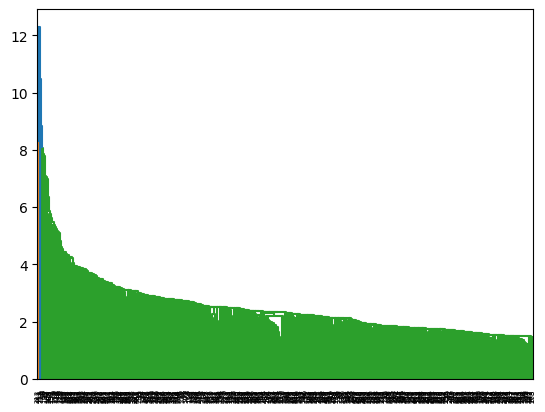

In [ ]:
distances = pdist(X, metric = "euclidean")
linkage_matrix  = linkage(distances, method = "single")
dendrogram(linkage_matrix)